# Ransomware Static Analysis

# Preparation

In [1]:
! pip install bottleneck numexpr pandas pefile ete3 pyqt5

^C


In [1]:
# import ete3
import glob
import numpy as np
import os
import pandas as pd
import pefile
# import PyQt5

In [2]:
ransomware_path = "C:/sample/ransomware/"
system32_path = "C:/sample/good/System32/"

In [3]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 100)
# pd.set_option('display.width', 1000)
# pd.set_option('max_colwidth', 400)

In [5]:
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.width")
pd.reset_option("display.max_colwidth")

# Define Functions

In [5]:
# Define function to create dataframes

def CreateDataFrame(path, attribute):
    df = pd.DataFrame()
    filesPath = glob.glob(path + "*")
    nameFiles = os.listdir(path)
    index = 0
    count = 0
    for filePath in filesPath:
        # print(file)
        pe = pefile.PE(filePath)
        if attribute == "FILE_HEADER":
            df.loc[index,'Name'] = nameFiles[index]
            for k, v in pe.dump_dict()['FILE_HEADER'].items():
                if isinstance(v,dict):
                    # print("{}: {}".format(k, v["Value"]))
                    df.loc[index, k] = v["Value"]
            # index = 0
            for k, v in pe.dump_dict()['OPTIONAL_HEADER'].items():
                if isinstance(v,dict):
                    # print("{}\n{}: {}".format(filePath, k, v["Value"]))
                    df.loc[index, k] = v["Value"]
            index += 1
        elif attribute == "DIRECTORY_ENTRY_IMPORT":
            try:
                for entry in pe.DIRECTORY_ENTRY_IMPORT:
                    for function in entry.imports:
                        if function.name != None:
                            # print("File:", filePath, "Dll", entry.dll, "API name:", api_call.name)
                            df.loc[count, 'Name'] = nameFiles[index]
                            df.loc[count, 'Dll'] = entry.dll
                            df.loc[count, 'Function'] = function.name
                            count += 1
                    # count += 1
                index += 1
            except AttributeError:
                print("File", filePath, "does not have imports.")
    return df

# Manipulating ransomware dataframe

In [6]:
# Create ransomware dataframe
ransomware_df = CreateDataFrame(ransomware_path, "FILE_HEADER")
#ransomware_df.to_csv(ransomware_path + "../ransomware_df.csv", index=False)

In [5]:
# Read ransomware CSV file
ransomware_df = pd.read_csv("ransomware_df.csv")

In [6]:
print(ransomware_df.shape)
ransomware_df.head()

(24, 38)


,Name,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,...,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes
0,131.sample,332.0,5.0,0x571C6108 [Sun Apr 24 06:00:40 2016 UTC],0.000000e+00,0.000000e+00,224.0,258.0,267.0,11.0,...,1024.0,0.0,3.0,33088.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0
1,Avaddon.sample,332.0,5.0,0x5D652AF9 [Tue Aug 27 13:07:05 2019 UTC],0.000000e+00,0.000000e+00,224.0,259.0,267.0,12.0,...,1024.0,756569.0,2.0,32768.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0
2,cerber.sample,332.0,4.0,0x5925F1A2 [Wed May 24 20:48:34 2017 UTC],0.000000e+00,0.000000e+00,224.0,259.0,267.0,9.0,...,1024.0,0.0,2.0,32768.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0
3,cryptowall.sample,332.0,4.0,0x54B4D689 [Tue Jan 13 08:25:45 2015 UTC],0.000000e+00,0.000000e+00,224.0,259.0,267.0,9.0,...,1024.0,0.0,2.0,32768.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0
4,Crysis.sample,332.0,3.0,0x58B8AF72 [Thu Mar 2 23:49:06 2017 UTC],1.919897e+09,1.564824e+09,224.0,259.0,267.0,10.0,...,512.0,0.0,2.0,34048.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0


In [45]:
# Create ransomware functions dataframe
ransomware_functions = CreateDataFrame(ransomware_path, "DIRECTORY_ENTRY_IMPORT")
# ransomware_functions.to_csv(ransomware_path + "../ransomware_functions.csv", index=False)

File C:/sample/ransomware\Thanos.sample does not have imports.


In [7]:
# Read ransomware fuctions CSV file
ransomware_functions = pd.read_csv("ransomware_functions.csv")

In [8]:
ransomware_functions.head(30)

,Name,Dll,Function
0,131.sample,b'SHLWAPI.dll',b'PathFileExistsW'
1,131.sample,b'SHLWAPI.dll',b'PathFileExistsA'
2,131.sample,b'KERNEL32.dll',b'Sleep'
3,131.sample,b'KERNEL32.dll',b'SizeofResource'
4,131.sample,b'KERNEL32.dll',b'GetConsoleWindow'
5,131.sample,b'KERNEL32.dll',b'GetVersionExW'
6,131.sample,b'KERNEL32.dll',b'GetModuleFileNameW'
7,131.sample,b'KERNEL32.dll',b'CreateFileW'
8,131.sample,b'KERNEL32.dll',b'MultiByteToWideChar'
9,131.sample,b'KERNEL32.dll',b'GetLastError'


In [11]:
# Create System32 dataframe
system32_df = CreateDataFrame(system32_path, "FILE_HEADER")
# system32_df.to_csv(system32_path + "../system32_df.csv", index=False)

In [9]:
# Read System32 CSV file
system32_df = pd.read_csv("system32_df.csv")

In [10]:
system32_df

,Name,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,...,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,BaseOfData
0,aadcloudap.dll,34404.0,7.0,0x5CCD15A1 [Sat May 4 04:31:29 2019 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,...,439425.0,3.0,16864.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN
1,aadtb.dll,34404.0,7.0,0x60BAFDF1 [Sat Jun 5 04:30:41 2021 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,...,1139912.0,2.0,16736.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN
2,AboveLockAppHost.dll,34404.0,7.0,0x5FF78DB7 [Thu Jan 7 22:39:51 2021 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,...,334257.0,2.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN
3,accessibilitycpl.dll,34404.0,7.0,0x57899883 [Sat Jul 16 02:14:27 2016 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,...,3825415.0,2.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN
4,accountaccessor.dll,34404.0,7.0,0x5FF78E70 [Thu Jan 7 22:42:56 2021 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,...,382452.0,3.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485,xwtpdui.dll,34404.0,7.0,0x5FF78DCC [Thu Jan 7 22:40:12 2021 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,...,313502.0,2.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN
3486,xwtpw32.dll,34404.0,7.0,0x5FF78E15 [Thu Jan 7 22:41:25 2021 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,...,164218.0,2.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN
3487,zipcontainer.dll,34404.0,6.0,0x57899BDE [Sat Jul 16 02:28:46 2016 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,...,124230.0,3.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN
3488,zipfldr.dll,34404.0,7.0,0x5FF78DA9 [Thu Jan 7 22:39:37 2021 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,...,389221.0,2.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN


In [12]:
# Create system32 functions dataframe
system32_functions = CreateDataFrame(system32_path, "DIRECTORY_ENTRY_IMPORT")
# system32_functions.to_csv(system32_path + "../system32_functions.csv", index=False)

File C:/sample/good/System32\ACCTRES.dll does not have imports.
File C:/sample/good/System32\adtschema.dll does not have imports.
File C:/sample/good/System32\advapi32res.dll does not have imports.
File C:/sample/good/System32\aeevts.dll does not have imports.
File C:/sample/good/System32\APHostRes.dll does not have imports.
File C:/sample/good/System32\apisetschema.dll does not have imports.
File C:/sample/good/System32\AppvClientEventLog.dll does not have imports.
File C:/sample/good/System32\appvetwclientres.dll does not have imports.
File C:/sample/good/System32\appvetwsharedperformance.dll does not have imports.
File C:/sample/good/System32\appvetwstreamingux.dll does not have imports.
File C:/sample/good/System32\AppVStreamingUX.exe does not have imports.
File C:/sample/good/System32\asferror.dll does not have imports.
File C:/sample/good/System32\auditpolmsg.dll does not have imports.
File C:/sample/good/System32\BlbEvents.dll does not have imports.
File C:/sample/good/System32\

FileNotFoundError: [WinError 2] O sistema não pode encontrar o arquivo especificado: 'C:/sample/good/System32\\system32_df.csv'

In [11]:
# Read System32 functions CSV file
system32_functions = pd.read_csv("system32_functions.csv")

In [12]:
system32_functions

,Name,Dll,Function
0,aadcloudap.dll,b'msvcrt.dll',b'_onexit'
1,aadcloudap.dll,b'msvcrt.dll',b'__dllonexit'
2,aadcloudap.dll,b'msvcrt.dll',b'_unlock'
3,aadcloudap.dll,b'msvcrt.dll',b'??1type_info@@UEAA@XZ'
4,aadcloudap.dll,b'msvcrt.dll',b'_errno'
...,...,...,...
460142,wincredprovider.dll,b'api-ms-win-core-sysinfo-l1-2-1.dll',b'GetSystemTimeAsFileTime'
460143,wincredprovider.dll,b'api-ms-win-core-interlocked-l1-2-0.dll',b'InitializeSListHead'
460144,wincredprovider.dll,b'api-ms-win-core-rtlsupport-l1-2-0.dll',b'RtlCaptureContext'
460145,wincredprovider.dll,b'api-ms-win-core-rtlsupport-l1-2-0.dll',b'RtlLookupFunctionEntry'


# Merge Dataframes

## Merge Ransomware and System32 Dataframes

In [28]:
# Merge ransomware_df.csv and system32_df.csv and output in merged_df.csv
ransomware_df['label'] = 1
system32_df['label'] = 0
frames = [ransomware_df, system32_df]
merged_df = pd.concat(frames)

# To write the dataframe in disk, uncomment the line bellow
# merged_df.to_csv("merged_df.csv", index=False)

In [13]:
# Read merged ransomware and System32 Dataframes CSV file
merged_df = pd.read_csv("merged_df.csv")
merged_df

,Name,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,Reserved1,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,ransomware,label
0,131.sample,332.0,5.0,0x571C6108 [Sun Apr 24 06:00:40 2016 UTC],0.000000e+00,0.000000e+00,224.0,258.0,267.0,11.0,0.0,122880.0,2299392.0,0.0,33303.0,4096.0,126976.0,4.194304e+06,4096.0,512.0,5.0,1.0,0.0,0.0,5.0,1.0,0.0,2433024.0,1024.0,0.0,3.0,33088.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0,1.0,1
1,Avaddon.sample,332.0,5.0,0x5D652AF9 [Tue Aug 27 13:07:05 2019 UTC],0.000000e+00,0.000000e+00,224.0,259.0,267.0,12.0,0.0,69632.0,49323520.0,0.0,22283.0,4096.0,73728.0,4.194304e+06,4096.0,512.0,5.0,1.0,0.0,0.0,5.0,1.0,0.0,49397760.0,1024.0,756569.0,2.0,32768.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0,1.0,1
2,cerber.sample,332.0,4.0,0x5925F1A2 [Wed May 24 20:48:34 2017 UTC],0.000000e+00,0.000000e+00,224.0,259.0,267.0,9.0,0.0,323072.0,294912.0,0.0,324832.0,4096.0,327680.0,4.194304e+06,4096.0,512.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,630784.0,1024.0,0.0,2.0,32768.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0,1.0,1
3,cryptowall.sample,332.0,4.0,0x54B4D689 [Tue Jan 13 08:25:45 2015 UTC],0.000000e+00,0.000000e+00,224.0,259.0,267.0,9.0,0.0,34816.0,210432.0,0.0,13447.0,4096.0,40960.0,4.194304e+06,4096.0,512.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,54423552.0,1024.0,0.0,2.0,32768.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0,1.0,1
4,Crysis.sample,332.0,3.0,0x58B8AF72 [Thu Mar 2 23:49:06 2017 UTC],1.919897e+09,1.564824e+09,224.0,259.0,267.0,10.0,0.0,40448.0,54272.0,0.0,43472.0,4096.0,45056.0,4.194304e+06,4096.0,512.0,5.0,1.0,0.0,0.0,5.0,1.0,0.0,101077.0,512.0,0.0,2.0,34048.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509,xwtpdui.dll,34404.0,7.0,0x5FF78DCC [Thu Jan 7 22:40:12 2021 UTC],0.000000e+00,0.000000e+00,240.0,8226.0,523.0,14.0,0.0,151040.0,108544.0,0.0,144048.0,4096.0,NaN,6.442451e+09,4096.0,512.0,10.0,0.0,10.0,0.0,10.0,0.0,0.0,274432.0,1024.0,313502.0,2.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN,0
3510,xwtpw32.dll,34404.0,7.0,0x5FF78E15 [Thu Jan 7 22:41:25 2021 UTC],0.000000e+00,0.000000e+00,240.0,8226.0,523.0,14.0,0.0,83968.0,62464.0,0.0,80800.0,4096.0,NaN,6.442451e+09,4096.0,512.0,10.0,0.0,10.0,0.0,10.0,0.0,0.0,163840.0,1024.0,164218.0,2.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN,0
3511,zipcontainer.dll,34404.0,6.0,0x57899BDE [Sat Jul 16 02:28:46 2016 UTC],0.000000e+00,0.000000e+00,240.0,8226.0,523.0,14.0,0.0,54784.0,25600.0,0.0,54768.0,4096.0,NaN,6.442451e+09,4096.0,512.0,10.0,0.0,10.0,0.0,10.0,0.0,0.0,98304.0,1024.0,124230.0,3.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN,0
3512,zipfldr.dll,34404.0,7.0,0x5FF78DA9 [Thu Jan 7 22:39:37 2021 UTC],0.000000e+00,0.000000e+00,240.0,8226.0,523.0,14.0,0.0,212480.0,178176.0,0.0,212256.0,4096.0,NaN,6.192890e+09,4096.0,512.0,10.0,0.0,10.0,0.0,10.0,0.0,0.0,405504.0,1024.0,389221.0,2.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN,0


## Merge Ransomware and System32 Functions

In [20]:
ransomware_functions = pd.read_csv("ransomware_functions.csv")
# ransomware_functions['ransomware'] = 1
# ransomware_functions['good'] = 0
ransomware_functions['label'] = 1


system32_functions = pd.read_csv("system32_functions.csv")
# system32_functions['ransomware'] = 0
# system32_functions['good'] = 1
system32_functions['label'] = 0

frames = [ransomware_functions, system32_functions]
merged_functions = pd.concat(frames)

# To write the dataframe in disk, uncomment the line bellow
# merged_functions.to_csv("merged_functions.csv", index=False)

In [14]:
merged_functions = pd.read_csv("merged_functions.csv")
merged_functions

,Dll,Function,ransomware,good
0,b'SHLWAPI.dll',b'PathFileExistsW',1,0
1,b'SHLWAPI.dll',b'PathFileExistsA',1,0
2,b'KERNEL32.dll',b'Sleep',1,0
3,b'KERNEL32.dll',b'SizeofResource',1,0
4,b'KERNEL32.dll',b'GetConsoleWindow',1,0
...,...,...,...,...
462218,b'api-ms-win-core-sysinfo-l1-2-1.dll',b'GetSystemTimeAsFileTime',0,1
462219,b'api-ms-win-core-interlocked-l1-2-0.dll',b'InitializeSListHead',0,1
462220,b'api-ms-win-core-rtlsupport-l1-2-0.dll',b'RtlCaptureContext',0,1
462221,b'api-ms-win-core-rtlsupport-l1-2-0.dll',b'RtlLookupFunctionEntry',0,1


In [5]:
# Print all PE header information:
pe = pefile.PE(ransomware_path + "Crysis.sample")
print(pe.dump_info())

----------Parsing Warnings----------

Imported symbols contain entries typical of packed executables.

----------DOS_HEADER----------

[IMAGE_DOS_HEADER]
0x0        0x0   e_magic:                       0x5A4D    
0x2        0x2   e_cblp:                        0x40      
0x4        0x4   e_cp:                          0x1       
0x6        0x6   e_crlc:                        0x0       
0x8        0x8   e_cparhdr:                     0x2       
0xA        0xA   e_minalloc:                    0x4       
0xC        0xC   e_maxalloc:                    0xFFFF    
0xE        0xE   e_ss:                          0x2       
0x10       0x10  e_sp:                          0x40      
0x12       0x12  e_csum:                        0x0       
0x14       0x14  e_ip:                          0xE       
0x16       0x16  e_cs:                          0x0       
0x18       0x18  e_lfarlc:                      0x1C      
0x1A       0x1A  e_ovno:                        0x0       
0x1C       0x1C  e_r

# Applying DAMICORE

## Create TXT files from ransomwares

In [4]:
def CreateTXTFiles(input_path, ransomware=False):
    output_path = "../damicore/executable-functions/"
    filesPath = glob.glob(input_path + "*")
    nameFiles = os.listdir(input_path)
    index = 0
    count = 0
    for filePath in filesPath:
        df = pd.DataFrame()
        pe = pefile.PE(filePath)
        try:
            for entry in pe.DIRECTORY_ENTRY_IMPORT:
                for function in entry.imports:
                    if function.name != None:
                        # print("File:", filePath, "Dll", entry.dll, "API name:", api_call.name)
                        # df.loc[count, 'Name'] = nameFiles[index]
                        df.loc[count, 'Dll'] = entry.dll
                        df.loc[count, 'Function'] = function.name
                        count += 1
        except AttributeError:
            print("File", filePath, "does not have imports.")
        
        if ransomware:
            output = output_path + "RANS-" + nameFiles[index]
        else:
            output = output_path + "GOOD-" + nameFiles[index]
        
        with open(output, 'w', newline='\r\n') as f:
            f.write( df.to_string(header=False, index=False) )
        index += 1
        count = 0


In [6]:
CreateTXTFiles(ransomware_path, True)
# CreateTXTFiles(system32_path)

File C:/sample/ransomware\Sodinokibi.sample does not have imports.
File C:/sample/ransomware\Thanos.sample does not have imports.


## Manipulating phylogenetic tree with ETE Toolkit

In [18]:
t = ete3.PhyloTree("../damicore/results/texts.newick")

In [19]:
# t.write(outfile="../damicore/results/tree.txt")
t.show()

TypeError: index 0 has type 'float' but 'int' is expected

In [82]:
import ete3
ete3.__file__
%run "C:\\Users\\Nilson\\AppData\\Roaming\\Python\\Python310\\site-packages\\ete3\\__init__.py"


ImportError: attempted relative import with no known parent package

In [1]:
pip install ncbitaxonomy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U https://github.com/etetoolkit/ete/archive/qt5.zip

## Manipulating phylogenetic tree with Dendropy

In [21]:
pip install dendropy

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 15.2/15.2 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for dendropy, since package 'wheel' is not installed.
  Running setup.py install for dendropy: started
  Running setup.py install for dendropy: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [22]:
import dendropy

In [30]:
tree1 = dendropy.Tree.get(path="../damicore/results/texts.newick", schema="newick")
# tree1.print_plot()
# print(tree1)

In [27]:
tree_data = []
tree = dendropy.Tree.get(path="../damicore/results/texts.newick",schema="newick")
pdc = tree.phylogenetic_distance_matrix()
for i, t1 in enumerate(tree.taxon_namespace[:-1]):
    for t2 in tree.taxon_namespace[i+1:]:
        tip_pair = {}
        tip_dist_list = []
        tip_pair[t1] = t2
        distance = pdc(t1, t2)
        tip_dist_list.append(tip_pair)
        tip_dist_list.append(distance)
        tree_data.append(tip_dist_list)

print(tree_data)

[[{<Taxon 0x1fecb4a9a20 'GOOD-XInput1_4.dll.txt'>: <Taxon 0x1fecb4aa140 'GOOD-XblGameSaveProxy.dll.txt'>}, 0.7296869533935587], [{<Taxon 0x1fecb4a9a20 'GOOD-XInput1_4.dll.txt'>: <Taxon 0x1fecb4aa920 'GOOD-xmllite.dll.txt'>}, 0.7019956119268421], [{<Taxon 0x1fecb4a9a20 'GOOD-XInput1_4.dll.txt'>: <Taxon 0x1fecb4a9bd0 'GOOD-zipcontainer.dll.txt'>}, 0.689414464948434], [{<Taxon 0x1fecb4a9a20 'GOOD-XInput1_4.dll.txt'>: <Taxon 0x1fecb4aab60 'GOOD-ztrace_maps.dll.txt'>}, 0.7047491965582733], [{<Taxon 0x1fecb4a9a20 'GOOD-XInput1_4.dll.txt'>: <Taxon 0x1fecb4a9ae0 'GOOD-XInputUap.dll.txt'>}, 0.7156876524847477], [{<Taxon 0x1fecb4a9a20 'GOOD-XInput1_4.dll.txt'>: <Taxon 0x1fecb4ab070 'GOOD-XblGameSaveTask.exe.txt'>}, 0.7346203972053095], [{<Taxon 0x1fecb4a9a20 'GOOD-XInput1_4.dll.txt'>: <Taxon 0x1fecb4aac20 'GOOD-xmlfilter.dll.txt'>}, 0.7165073267916996], [{<Taxon 0x1fecb4a9a20 'GOOD-XInput1_4.dll.txt'>: <Taxon 0x1fecb4aace0 'GOOD-XpsRasterService.dll.txt'>}, 0.7246969968169852], [{<Taxon 0x1fecb4

## Manipulating phylogenetic tree with Phylo

In [26]:
! pip install Bio Matplotlib pydot

Defaulting to user installation because normal site-packages is not writeable


In [27]:
from Bio import Phylo

In [28]:
tree = Phylo.read("../damicore/results/test.newick", "newick")
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.005272322794962037)
            Clade(branch_length=0.004397760803674822)
                Clade(branch_length=0.007607311379874443)
                    Clade(branch_length=0.012151234857353449)
                        Clade(branch_length=0.005636773837115611)
                            Clade(branch_length=0.01943073512341268)
                                Clade(branch_length=0.017648411983897074)
                                    Clade(branch_length=0.40063608585495647, name='GOOD-WUDFCoinstaller.dll')
                                    Clade(branch_length=0.028468436687728915)
                                        Clade(branch_length=0.036986149156398536)
                                            Clade(branch_length=0.01346926885151975)
                                                Clade(branch_length=0.01691814086804655)
                                                    Clade(branch_length=0.022310

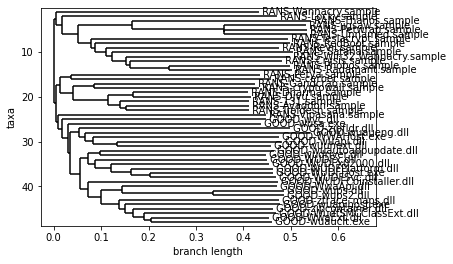

In [29]:
tree.ladderize()  # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)

In [30]:
import pylab
Phylo.draw_graphviz(tree)
pylab.show()

AttributeError: module 'Bio.Phylo' has no attribute 'draw_graphviz'